# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [35]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= \sum_{i=1}^N \frac{\partial}{\partial \hat{\beta_0}} \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
%
&= \sum_{i=1}^N \frac{\partial}{\partial \hat{\beta_0}} \left(\left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)\cdot \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)\right) \\
%
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.



### Explicit derivations

#### extended derivation (using the product rule)
$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2
\\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 
\\
&= \sum_{i=1}^N \frac{\partial}{\partial \hat{\beta_0}} \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \hspace{10mm} \mbox{(by sum rule)}
\\
&= \sum_{i=1}^N \frac{\partial}{\partial \hat{\beta_0}} \left[ \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \cdot \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \right] 
\\
&= \sum_{i=1}^N \left[ \frac{\partial}{\partial \hat{\beta_0}}\left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \cdot \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)  + \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \cdot \frac{\partial}{\partial \hat{\beta_0}} \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \right] \hspace{1mm} \mbox{(by product rule)}
\\
&= \sum_{i=1}^N 2 \cdot \left[ \frac{\partial}{\partial \hat{\beta_0}} \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \cdot \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \right] 
\\
&= \sum_{i=1}^N 2 \cdot \left[\left( \frac{\partial}{\partial \hat{\beta_0}} y_i - \left( \frac{\partial}{\partial \hat{\beta_0}} \hat{\beta}_0 + \frac{\partial}{\partial \hat{\beta_0}} \hat{\beta}_1 x_i \right) \right) \cdot \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \right]  
\\
&= \sum_{i=1}^N 2 \cdot \left[\left( 0 - \left( 1 + 0 \right) \right) \cdot \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \right]  
\\
&= \sum_{i=1}^N 2 \cdot \left[-1 \cdot \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \right]  
\\
&= \sum_{i=1}^N -2 \cdot \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)
\\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(using product [not chain] rule)} 
\\
\end{align}
$


#### extended derivation (using the chain rule)
$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2
\\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 
\\
&= \sum_{i=1}^N \frac{\partial}{\partial \hat{\beta_0}} \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 
\\
&= \sum_{i=1}^N \frac{\partial}{\partial \hat{\beta_0}} \left[h\left(y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right)\right)\right] 
\\
& \hspace{55mm} \mbox{let } h(z) = z^2
\\
&= \sum_{i=1}^N \frac{\partial}{\partial \hat{\beta_0}} \left[h\left(g(\hat{\beta_0})\right)\right] 
\\
& \hspace{55mm} \mbox{let } g(z) = y_i - \left( z + \hat{\beta}_1 x_i \right)
\\
&= \sum_{i=1}^N \frac{\partial}{\partial \hat{\beta_0}} \left[ (h \circ g)(\hat{\beta_0})\right] \hspace{25mm} \mbox{(by functional composition)}
\\
&= \sum_{i=1}^N h'\left(g(\hat{\beta_0})\right)\cdot g'(\hat{\beta_0}) \hspace{25mm} \mbox{(by chain rule)}
\\
&= \sum_{i=1}^N 2\cdot g(\hat{\beta_0})\cdot -1 \hspace{25mm} \mbox{(by taking the derivatives of } h \mbox{ and } g \mbox{)}
\\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by substituting } g\mbox{'s definition)} 
\end{align}
$

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [36]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [37]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [38]:
boston.data.shape

(506, 13)

In [39]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [40]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [42]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [43]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [44]:
print(boston.target.shape)

(506,)


In [45]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [46]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

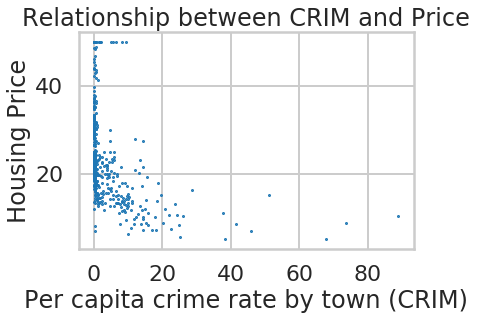

In [47]:
plt.scatter(bos.CRIM, bos.PRICE, s=1)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
# plt.figure(figsize=(18, 8), dpi=80)

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [48]:
# your turn: describe relationship
# the relationship is negative: smaller crime rate <===> larger house price
# the relationship is non-linear: many points are clustered around 0 (for crime)
# it is strange that many houses have the same maximum price even though the crimerate increases (to ~15 points)
# it is interesting that for marginally lower crime rates prices range from max to (almost) min
# there are several values that can turn out to be outliers (large CRIM); more investigation needed

Text(0.5, 1.0, 'Relationship between RM and Price')

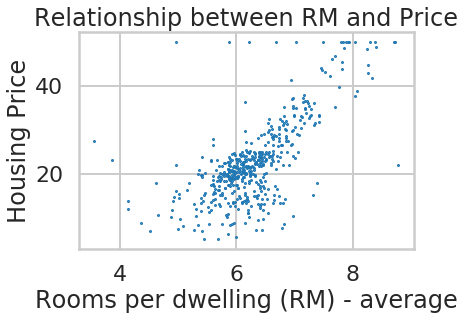

In [49]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, s=1)
plt.xlabel("Rooms per dwelling (RM) - average")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Description: the relationship is positive (more rooms <===> higher price) and there seems to be a well defined linear trend (but also several exceptions, especially regarding max price values).

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

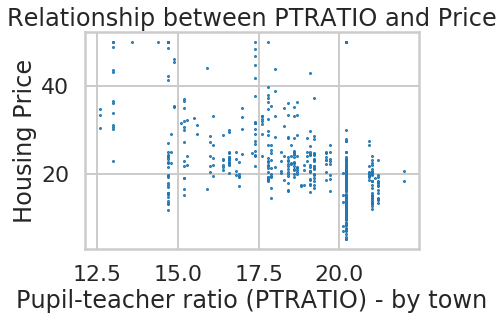

In [50]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, s=1)
plt.xlabel("Pupil-teacher ratio (PTRATIO) - by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

Description: The data does not seem to present a consistent positive or negative linear relationship accross the spectrum og PTRATIO values. A slight negative trend can be noticed but the he variance does not seem to be homogenous (which is a necessary assumption for linear regression). 

Text(0.5, 1.0, 'Relationship between TAX and Price')

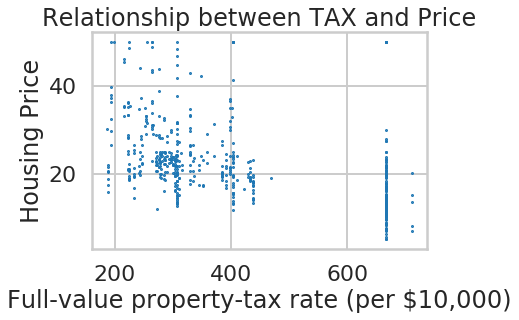

In [51]:
# your turn: create some other scatter plots
plt.scatter(bos.TAX, bos.PRICE, s=1)
plt.xlabel("Full-value property-tax rate (per $10,000)")
plt.ylabel("Housing Price")
plt.title("Relationship between TAX and Price")

Text(0.5, 1.0, 'Relationship between B and Price')

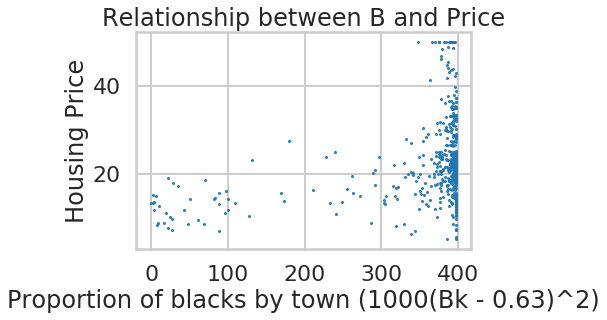

In [52]:
# your turn: create some other scatter plots
plt.scatter(bos.B, bos.PRICE, s=1)
plt.xlabel("Proportion of blacks by town (1000(Bk - 0.63)^2)")
plt.ylabel("Housing Price")
plt.title("Relationship between B and Price")

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

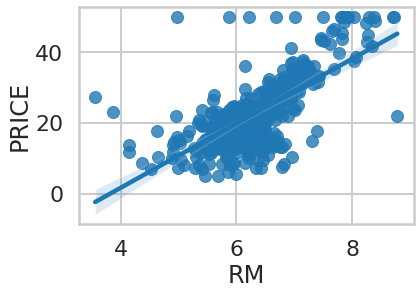

In [20]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

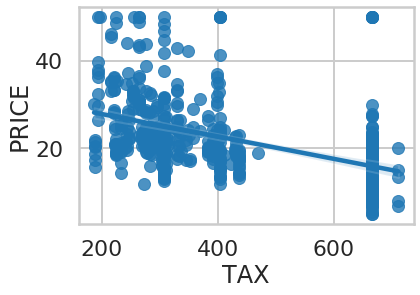

In [21]:
sns.regplot(y="PRICE", x="TAX", data=bos, fit_reg = True)

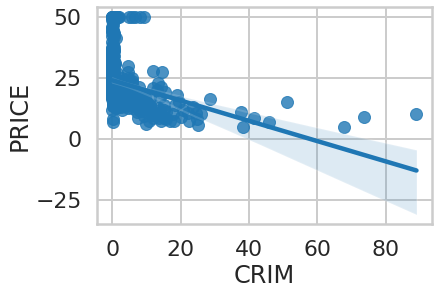

In [22]:
sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True)

### Histograms
***


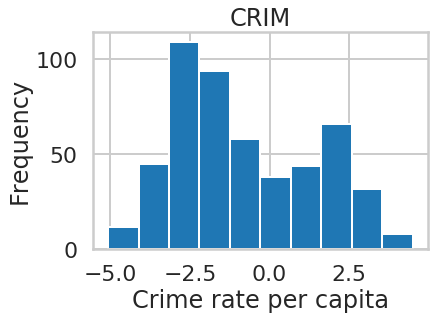

In [23]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

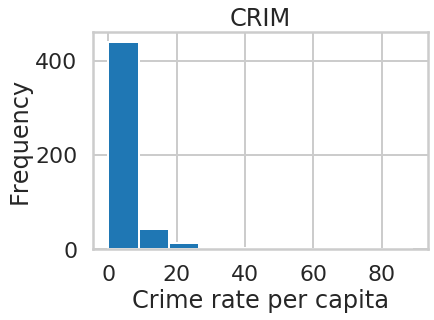

In [24]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

The purpose of taking the log is to transform the data to better scale the ranges of the values of interest. By making this transformation we gain more insight and intuition, also the influence of extreme values (very large CRIM) over the shape/behaviour of the dataset is reduced. We can notice that the data is more balanced. 

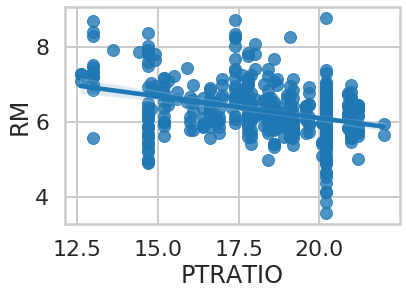

In [25]:
sns.regplot(y="RM", x="PTRATIO", data=bos, fit_reg = True)

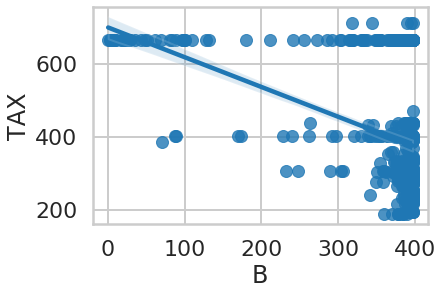

In [26]:
sns.regplot(y="TAX", x="B", data=bos, fit_reg = True)

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [90]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

In [28]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.49e-74
Time:                        20:48:16   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5, 1.0, 'Relationship between Fitted and Prices')

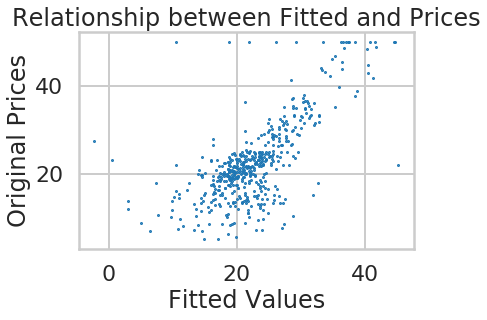

In [29]:
# your turn
plt.scatter(m.fittedvalues, bos.PRICE, s=1)
plt.xlabel("Fitted Values")
plt.ylabel("Original Prices")
plt.title("Relationship between Fitted and Prices")

Description: a noticeable effect of grouping around a maximum ceiling price of 50K. A recognizable secondary diagonal (45 angle) linear trend and a dispersion of values (larger variance from the linear trend) in the lower part.

### Fitting Linear Regression using `sklearn`


In [55]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predict()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [59]:
# Look inside lm object
lm.fit(X,bos.PRICE)
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [60]:
lm.intercept_

36.45948838509015

In [61]:
y = bos['PRICE']
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
pred = lm.predict(X)

In [63]:
sco = lm.score(X,y)
sco

0.7406426641094095

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [51]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [67]:
# your turn
lm_no_intercept = LinearRegression(fit_intercept=False)
lm_no_intercept.fit(X, y) # 1. Fit a model without intercept 

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [68]:
lm_no_intercept.intercept_ # check that the intercept crosses through the origin (intercept = 0)

0.0

In [73]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [74]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [75]:
lm_no_intercept.coef_

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [91]:
# deciding on whether the lm should cross the origin requires substantive knowledge of the field; 
# in the UCLA example theory supports a model without intercept (because a positive reading coefiecient 
# is not compatible wit a null writing coeficient)
# Probably a house salesman or a real-estate market expert has the needed domain knowledge to evaluate
# whether or not a similar relation exists between any of the predictors. 
# Absent substantive knowledge, I will rely on statistical testing to determine whether the 
# intercept is different from zero using an alpha threshold (P>|t|) of 0.05 - 
# i.e., probability of obtaining such a large test statistic conditinal on the null hypothesis

In [13]:
# I use the statmodels.api package to get the standard error and compute the test statistic
from statsmodels.api import OLS
OLS(bos.PRICE,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):                        0.00
Time:                        19:59:28   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0929      0.034     -2.699      0.007      -0.161      -0.025
1              0.0487      0.014      3.382      0.001       0.020       0.077
2             -0.0041      0.064     -0.063      0.950      -0.131       0.123
3              2.8540      0.904      3.157      0.002       1.078       4.630
4             -2.8684      3.359     -0.854      0.394      -9.468       3.731
5              5.9281      0.309     19.178      0.000       5.321       6.535
6             -0.0073      0.014     -0.526      0.599      -0.034       0.020
7             -0.9685      0.196     -4.951      0.000      -1.353      -0.584
8              0.1712      0.067      2.564      0.011       0.040       0.302
9             -0.0094      0.004     -2.395      0.017      -0.017      -0.002
10            -0.3922      0.110     -3.570      0.000      -0.608      -0.176
11             0.0149      0.003      5.528      0.000       0.010       0.020
12            -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# fit the model with intercept included
OLS(bos.PRICE,X_intercept).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        14:35:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
# based on the summary below, and assuming all OLS assumptions are met
# the intercept should be included in the model as it is significantly different from 0

# Because the P is so small I would not recommend a model without intercept.

In [100]:
# statsmodels does not include and intercept by default
# to fit an intercept I have to add a column of 1's to the matrix of predictors
import statsmodels.api as sm
X_intercept = sm.add_constant(X)

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [ ]:
# Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and 
# identically distributed). To satisfy this, is it enough that the residuals are normally distributed?
# Explain your answer.

# Answer: NO. this is not enough.

# Because residuals can be normally distributed (meaning that the shape of the residuals - obtained after 
# fitting the regression model by subtracting predicted from observed values - resembles a well-behaved 
# bell-curve based on graphical tests, skewness and kurtosis not significantly different from zero, 
# statistical tests like Kolmogorov-Smirnov showing no significant departures from a normal distribution etc.) 

# without the data being i.i.d. (i.e., data on different rows may be dependent/clustered, and without 
# same process generating the data);

# All plots or diagnostics based on residuals (data at hand) do not say anything about whether data is IID
# (iid asumption depends on the data generating process and on how the data were collected) 
# may show some types of non-IID, but lack of these does not guarantee that the data is IID.

# In coclusion, failure to reject normality of residuals never proves that data is IID.
# decision whether the iid assumption is tenable should be based on how data was collected,
# and on substantive theory concerning data generating process.

In [ ]:
# Exercise: True or false. To use linear regression, 𝑌 must be normally distributed. Explain your answer.

# Answer: False.
# General linear models assume that RESIDUALS/ERRORS in the model are normally distributed (not Y)
# Also, for many statistical tests, normality assumption actually refers to normality of the sampling distribution
# not to the normality of Y (the outcome variable)

In [ ]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

In [ ]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

In [ ]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [ ]:
# first five predicted prices
lm.predict(X)[0:5]

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

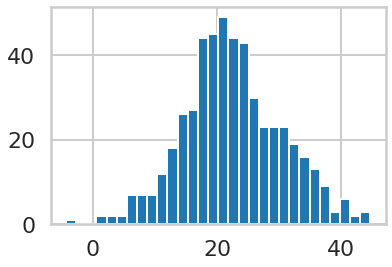

In [96]:
# your turn
predictions = lm.predict(X)
plt.hist(predictions, bins = 30)
plt.show()

The shape od the distribution is consistent with a normal distribution. There is no significant skewness or kurtosis. The values are centered around 20k and evely spread from 0 to 50. There seems to be a negative prediction (also several near zero values). These should definitely be considered outliers because a negative price prediction is not consistent with the domain knowledge. It can be explained as an output of the liniar equation, however it should probaly be eliminated because the input is most likely an outlier.

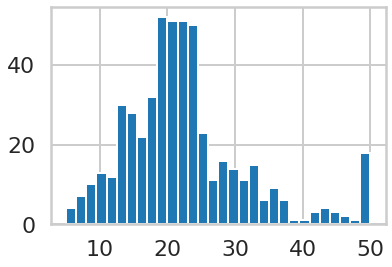

In [150]:
# Compare with the real prices histogram
plt.hist(bos.PRICE, bins = 30)
plt.show()

In [148]:
# Find the (index of) negative price predicted value
[(x[0], x[1]) for x in list(enumerate(predictions)) if x[1] < 0]

[(414, -4.281310709184851)]

In [116]:
# Check that the real price is not negative 
y[414]

7.0

In [149]:
# Identify CRIM values that are most likely outliers
[(x[0], x[1]) for x in list(enumerate(X.CRIM)) if x[1] > X.CRIM.mean() + 4 * X.CRIM.std()]

[(380, 88.9762),
 (398, 38.3518),
 (404, 41.5292),
 (405, 67.9208),
 (410, 51.1358),
 (414, 45.7461),
 (418, 73.5341)]

In [119]:
# inspect the distribution of CRIM values
bos.PRICE.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [14]:
# inspect the predictors at index 414 (the value that produces a negative price)
X.iloc[414]

0      45.7461
1       0.0000
2      18.1000
3       0.0000
4       0.6930
5       4.5190
6     100.0000
7       1.6582
8      24.0000
9     666.0000
10     20.2000
11     88.2700
12     36.9800
Name: 414, dtype: float64

In [64]:
# compare CRIM with other predictor variables distributions
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [137]:
# Confirm that CRIM contains ouliers using a standardized version of features dataset X

from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [138]:
# Confirm that CRIM has outliers using the standardized dataset 
co_tuples = [(x[0], x[1][0])  for x in list(enumerate(X_scaled)) if x[1][0] > 4]
co_tuples

[(380, 9.933930601860267),
 (398, 4.042605524928546),
 (404, 4.412369834222935),
 (405, 7.483645639967817),
 (410, 5.5303209306122705),
 (414, 4.903104118815214),
 (418, 8.136883506576424)]

In [139]:
crime_outliers_indeces = list(map(lambda x: x[0], co_tuples))

Based on this I would eliminate the CRIM outliers from the dataset

Text(0.5, 1.0, 'Relationship between Fitted and Prices')

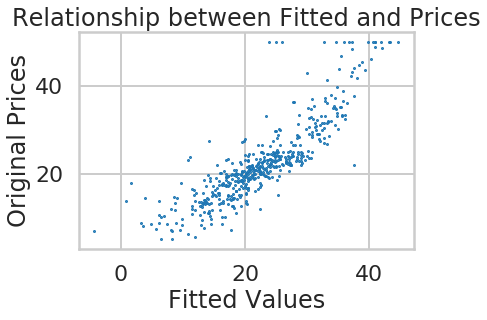

In [115]:
# Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree 
plt.scatter(predictions, bos.PRICE, s=1)
plt.xlabel("Fitted Values")
plt.ylabel("Original Prices")
plt.title("Relationship between Fitted and Prices")

In [1]:
# Exercise: We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. 
# What are the advantages and disadvantages of each based on your exploration? 

# ANSWER: `statsmodels` computes more statistical metrics (tests, p-values, etc.)
#          and makes these values easyly avalable for use in inferences
#         `scikit-learn` allows more direct computations while modelling (working directly with lists, enums, etc.)

# Based on the information provided by both packages, what advantage does `statsmodels` provide?
#         Answer: `statsmodels` provides advantages if your domain specific knowledge is limited and 
#         you need to rely on statistical test/measures/metrics in order to guide your predictions

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [101]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [ ]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [79]:
# your turn

In [80]:
lm.coef_

array([-2.1571753])

In [81]:
lm.intercept_

62.34462747483265

In [73]:
# the coeficient shows an inverse relationship; and the intercept indicates an 
# expected price of ~62 when the PTRATIO is null

In [82]:
# Exercise: Calculate (or extract) the 𝑅2 value. What does it tell you?
pt_ratio = X[['PTRATIO']]
lm.fit(pt_ratio, bos.PRICE)
pt_ratio_intercept = sm.add_constant(pt_ratio)

OLS(bos.PRICE,pt_ratio_intercept).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.61e-34
Time:                        20:25:16   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# The $R^2$ is big, which tells us that the percentage of variance in 
# price explained by the pupil-teacher ration is more than a quarter

In [ ]:
# Exercise: Compute the 𝐹-statistic. What does it tell you?

# Answer: We can see that the F-statistic is F(df1=1,df2=504) = 175.1, showing that the regression model
# does a better prediction job than a mean model, explaining a significant percentage of the 
# variance (~26%) in the outcome variable 

In [ ]:
# Exercise: Take a close look at the 𝐹-statistic and the 𝑡-statistic for the regression coefficient. 
# What relationship do you notice? 
# Note that this relationship only applies in *simple* linear regression models.

# With only one predictor in the model we notice that t = -13.233 
# we have the following relationship: t-statistic ^2 = -13.233^2 = 175.1 = F-statistic

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [86]:
# your turn
pred_3 = X[['CRIM', 'RM', 'PTRATIO']]
lm.fit(pred_3, bos.PRICE)
pred_3_intercept = sm.add_constant(pred_3)

OLS(bos.PRICE,pred_3_intercept).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           6.15e-98
Time:                        10:37:19   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Exercise: Compute or extract the 𝐹-statistic. What does it tell you about the model?

# Answer: the F-statistic for the model including the three predictors is F(df1=3,df2=502) = 245.2, which
#          indicated that the new model explains better the price than the previous model based only on 
#          intercept

In [ ]:
# Exercise: Compute or extract the 𝑅2-statistic. What does it tell you about the model?

# Answer: The model including the three predictors explains a significant proportion of variance in price
#           (~60%) percentage of variance that is significantly different from zero given an alpha threshold
#           of 0.05 (F(df1=3,df2=502) = 245.2, p=6.15e-98)

In [ ]:
# Exercise: Which variables in the model are significant in predicting house price? 
#     Write a story that interprets the coefficients.

# Answer: We can notice that all three predictors are significant given an alpha level corrected for 
#         multiple testiong (all p-values are < 0.05 / 3). 
#         The crime rate has a negative relationship with the price (as expected)
#              (coeff = -0.2050, se = 0.032, t-stat = -6.399 p-value < 0.001); 
#              this means that increasing crime rate by one standard deviation will, cetris paribus, reduce 
#              the house market valuation by approx 0.20 of the price.
#         The PTRATIO also has a negative relationship with the price (as expected)
#              (coeff = -1.0695, se = 0.133, t-stat = -8.051 p-value < 0.001); 
#              this means that increasing the number of children per teacher with one standard 
#              deviation will, cetris paribus, reduce the house market valuation by approx 1.06 of the price.
#         The RM has a positive relationship with the price 
#              (coeff = 7.3804, se = 0.402, t-stat = 18.382 p-value < 0.001); 
#              this means that, as expected, increasing the numuber of rooms by one standard 
#              deviation will, cetris paribus, increase the house market valuation by approx 7.5 of the price.


In [84]:
pred_3.describe()

,CRIM,RM,PTRATIO
count,506.000000,506.000000,506.000000
mean,3.613524,6.284634,18.455534
std,8.601545,0.702617,2.164946
min,0.006320,3.561000,12.600000
25%,0.082045,5.885500,17.400000
50%,0.256510,6.208500,19.050000
75%,3.677083,6.623500,20.200000
max,88.976200,8.780000,22.000000


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [87]:
pred_4 = X[['CRIM', 'RM', 'PTRATIO', 'AGE']]
lm.fit(pred_4, bos.PRICE)
pred_4_intercept = sm.add_constant(pred_4)

OLS(bos.PRICE,pred_4_intercept).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     194.5
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          1.61e-100
Time:                        10:38:09   Log-Likelihood:                -1603.1
No. Observations:                 506   AIC:                             3216.
Df Residuals:                     501   BIC:                             3237.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5601      4.023     -0.139      0.889      -8.464       7.343
CRIM          -0.1653      0.033     -5.031      0.000      -0.230      -0.101
RM             7.1588      0.398     17.970      0.000       6.376       7.941
PTRATIO       -0.9967      0.132     -7.563      0.000      -1.256      -0.738
AGE           -0.0424      0.010     -4.233      0.000      -0.062      -0.023
==============================================================================
Omnibus:                      277.448   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2911.615
Skew:                           2.176   Prob(JB):                         0.00
Kurtosis:                      13.916   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Answer: we can compare the AIC statistics of the two models:
#          The model with three predictors had a larger value (3232) than the model using four predictors (3216)
#          this indicates that, as expected, adding a new predictor, age in this particular case, leads to
#          a better fit. 
#          This is also confirmed by comparing the models' F-statistics: the nested (or reduces) model has 
#          an F value of 245.2 while the nesting model, enriched with an additional predictor (AGE) has 
#          an F value of 194.5


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [120]:
# Your turn.
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *

model = smf.ols(formula='PRICE ~ RM', data=bos)

In [121]:
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           2.49e-74
Time:                        15:01:24   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

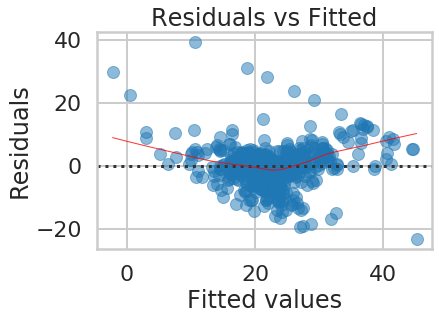

In [122]:
model_fitted_y = fitted.fittedvalues # model values
model_residuals = fitted.resid # model residuals
model_norm_residuals = fitted.get_influence().resid_studentized_internal # normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals)) # absolute squared normalized residuals
model_abs_resid = np.abs(model_residuals) # absolute residuals
model_leverage = fitted.get_influence().hat_matrix_diag # leverage, from statsmodels internals
model_cooks = fitted.get_influence().cooks_distance[0] # cook's distance, from statsmodels internals

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(
    model_fitted_y, bos.columns[-1], data=bos,
    lowess=True, scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [116]:
# Exercise: Construct a fitted values versus residuals plot. 
# What does the plot tell you? Are there any violations of the model assumptions?

# Answer: when model assumptions are met the plot should resemble a 
#         band (a random array of dots evenly dispersed around 0). 
# This gtaph shows that the liniarity assumption is satisfied (we observe a linear 
# trend with points grouped around 0); the homogeneity of variance assumption 
# (the graph does not tend to funnel out) is also met, there is no major variance across the residuals

Text(0.5, 0, 'Normalized residuals')

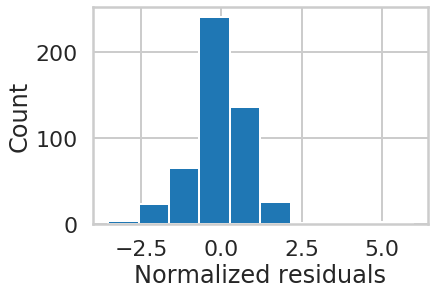

In [123]:
plt.hist(fitted.resid_pearson)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')

<StemContainer object of 3 artists>

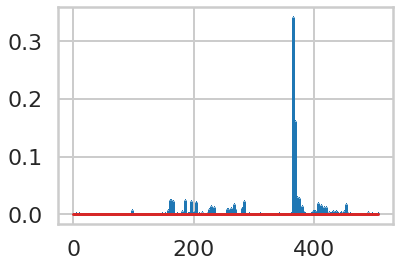

In [124]:
influence = fitted.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)

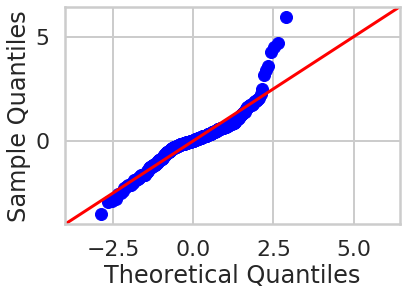

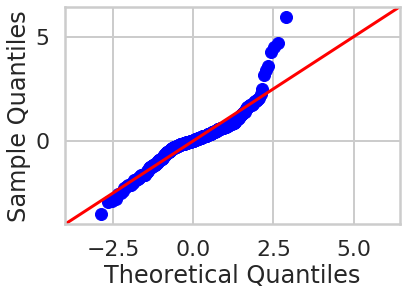

In [127]:
sm.qqplot(fitted.resid_pearson, line ='45') 

In [ ]:
# Exercise: Construct a quantile plot of the residuals. What does the plot tell you?
# Answer: We can notice a slight tendency of higher values in the 2.5 to 5.0 range.
#         This can probably be explained by the rounding down of values larger than 50K, which is 
#         is also noticeable in the ceiling effect of the data.

In [ ]:
# Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot 
# compared to each other?
# Answer: Both plots reveal useful information about the model when interpreted carefully:
#         the quantile plot shows the larger value tendency in the upper range of the price values 
#         the fitted vs. residual plot also reveals a lower value tendency in the lower price range values
#         whish is only marginally noticeable in the quantile plot. 


In [ ]:
# Exercise: Identify any outliers (if any) in your model and write a story describing what these 
# outliers might represent.
# Answer: The previous analysis identified several outlier values for the CRIM predictor values. Given 
#         the large values for these 6 entries and how far they are out of the range we can hypothesize
#         they are input errors. Eliminating them form the analysis will probably increase the predictions
#         it is also possible to replace them (for example: assume that there is an decimal input error 88 -> 8.8)


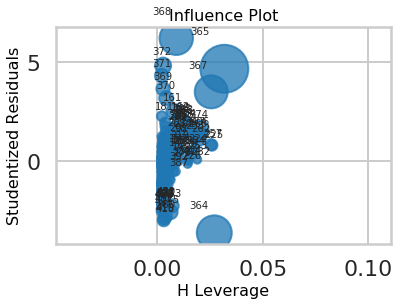

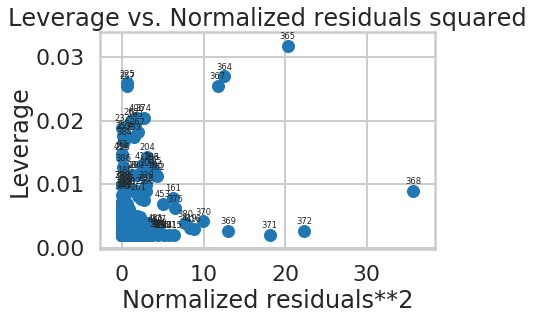

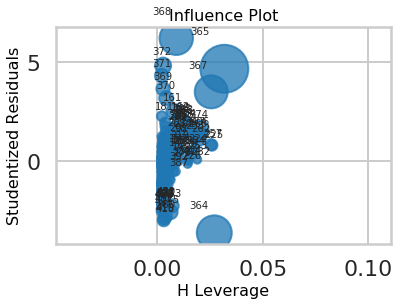

In [129]:
plt.rc('font', size=7)
plot_leverage_resid2(fitted)
influence_plot(fitted)

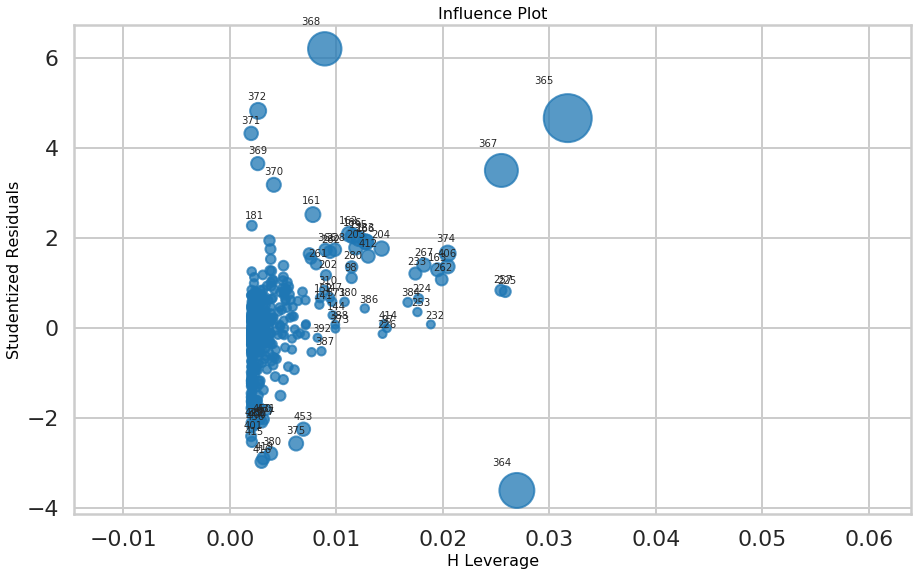

In [135]:
fig, ax = plt.subplots(figsize=(15,9))
fig = sm.graphics.influence_plot(fitted, alpha  = 0.05, ax = ax, criterion="cooks")

In [ ]:
# Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story 
# explaining possible reasons for the high leverage points.
# Answer: We can notice in the plot that several data points have an undue influence on the regression line
#         namely, there are 45 entries with a leverage value larger than twice the average leverage
#         calculated using k+1/n. However, none of these entries (or any other poitns in the data set) 
#         have a Cook distance larger than 1.


In [ ]:
# Exercise: Remove the outliers and high leverage points from your model and run the regression again. 
# How do the results change?
# Answer: We can notice that after removing the high leverage data points the liniarity assumption in the
#         fitted versus residuals plot becomes satisfied to a larger degree. Based on this we can conclude
#         that eliminating the large leverage points improves the performance of the model's prediction.

In [140]:
crime_outliers_indeces

[380, 398, 404, 405, 410, 414, 418]

In [142]:
type(bos)

pandas.core.frame.DataFrame

In [144]:
bos_no_outliers = bos.drop(bos.index[crime_outliers_indeces])

In [145]:
model = smf.ols(formula='PRICE ~ RM', data=bos_no_outliers)

In [147]:
fitted = model.fit()
model_fitted_y = fitted.fittedvalues # model values
model_residuals = fitted.resid # model residuals
model_norm_residuals = fitted.get_influence().resid_studentized_internal # normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals)) # absolute squared normalized residuals
model_abs_resid = np.abs(model_residuals) # absolute residuals
model_leverage = fitted.get_influence().hat_matrix_diag # leverage, from statsmodels internals
model_cooks = fitted.get_influence().cooks_distance[0] # cook's distance, from statsmodels internals

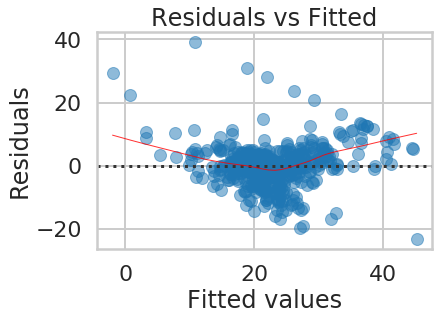

In [149]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(
    model_fitted_y, bos_no_outliers.columns[-1], data=bos_no_outliers,
    lowess=True, scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [161]:
n_obs = len(bos_no_outliers)
n_obs

499

In [189]:
# The average leverage is calculated as k+1/n = 2/499; we drop values twice as large as this value.
high_leverage = list(filter(lambda x: x[1] > 4/len(bos_no_outliers), list(enumerate(model_leverage))))
large_residuals = list(filter(lambda x: x[1] > 4/len(bos_no_outliers), list(enumerate(model_cooks))))
n_high_leverage = len(high_leverage)
n_high_leverage_indeces = list(map(lambda x: x[0], high_leverage))

In [190]:
bos_no_large_leverage = bos_no_outliers.drop(bos_no_outliers.index[n_high_leverage_indeces])

In [193]:
model = smf.ols(formula='PRICE ~ RM', data=bos_no_large_leverage)
fitted = model.fit()
model_fitted_y = fitted.fittedvalues # model values

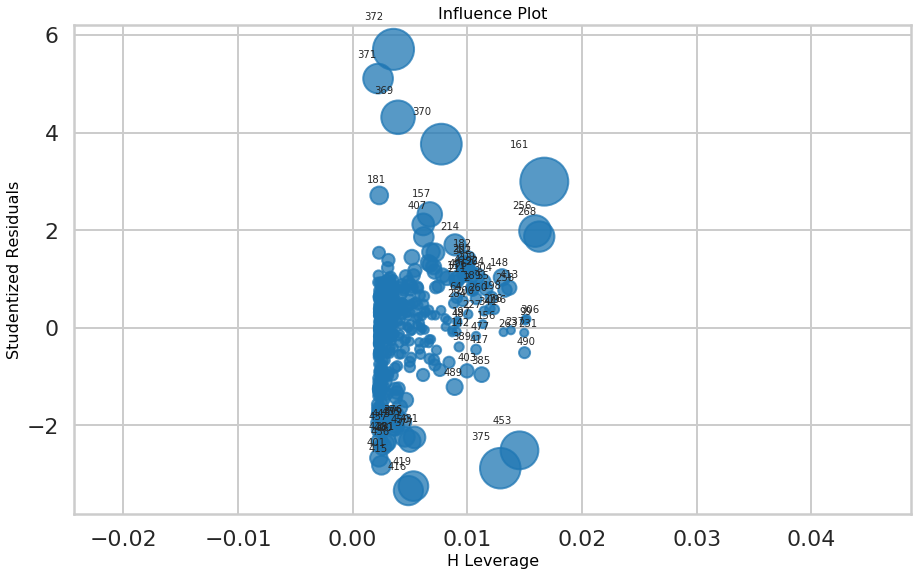

In [194]:
fig, ax = plt.subplots(figsize=(15,9))
fig = sm.graphics.influence_plot(fitted, alpha  = 0.05, ax = ax, criterion="cooks")

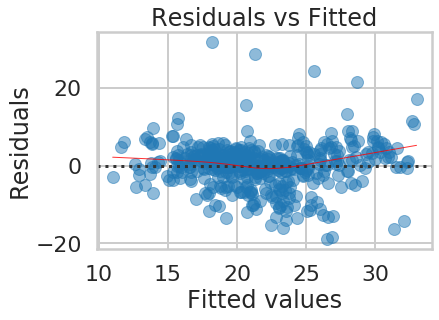

In [195]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(
    model_fitted_y, bos_no_large_leverage.columns[-1], data=bos_no_large_leverage,
    lowess=True, scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');